# Human Resources Analytics

{badge}`python3,badge-success` {badge}`case study,badge-secondary` {badge}`human resources,badge-warning` 

## Introduction

As organizations continue to grow and optimize its human resources, to acknowledge the differences that arise in the workplace that affect daily activities in terms of employee moral, productivity, and turnover rates.

To identify and understand these differences in the heirarchy of the organization, leaders need a framework in which to strategize HR objectives such as staffing estimates, forecasting, retention, training and compensation.

**This article demonstrates an analytics framework for HR data to provide a comprehensive overview of an organization's workforce.**

What we will cover:

1. **Pre-processing:** To prepare and clean the dataset for EDA
2. **Exploratory Data Analysis:** To investigate variable relationships
3. **Findings:** To highlight and dig deeper on the key relationships found
4. **Assumption Testing:** To check if the data meets the statistical assumptions requirements.

**Dataset:** We use the synthetic dataset designed by Drs. Rich Huebner and Carla Patalano (https://rpubs.com/rhuebner/hr_codebook_v14) which was created specifically for a case study in the college that they teach at.
***

## Pre-processing

This section contains:

- **Inspect each variable** for data types and missing values
- **Filter redundant variables** to remove irrelevant data
- **Cleaning ambiguous data** by replacement to uniform
- **Address missing data** by imputation or filtering
- **Convert each variable** to proper data type 
- **Create calculated variables** from existing ones


In [166]:
# employee personal view - married, gender, status, counts, age
# org structure view - manager, departments, counts
# salary view
# FILTER ONLY NOT RESIGNED
# lead measures view - performance score, engagement surve, latest date perfroamcen
# lag measures - absences, late, resigned or not

In [167]:
import pandas as pd
import numpy as np
fpath = '/Volumes/data/projects/data/HRDataset_v14.csv'
df = pd.read_csv(fpath)

In [168]:
# dataframe styles
t_props = [
  ('font-size', '80%')
  ]
   
styles = [
  dict(selector="th", props=t_props),
  dict(selector="td", props=t_props)
  ]

### Inspecting the variables

In [169]:
# checking for variable names
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [170]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [171]:
df.head().style.set_table_styles(styles)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,nan,N/A-StillEmployed,Active,Production,Michael Albert,22.000000,LinkedIn,Exceeds,4.600000,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000000,Indeed,Fully Meets,4.960000,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000000,LinkedIn,Fully Meets,3.020000,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,nan,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000000,Indeed,Fully Meets,4.840000,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000000,Google Search,Fully Meets,5.000000,4,0,2/1/2016,0,2


### Filtering irrelevant

We look at unique counts to see redundancy, seems like `EmpID`,  `DeptID`, `PositionID`,`ManagerID`, `MaritalStatusID`, `MarriedID` are redundant

In [172]:
df.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [173]:
# Position has multiple PositionID, might signify rank or levels
df[['Position','PositionID']].groupby('Position').nunique()

,PositionID
Position,
Accountant I,1
Administrative Assistant,1
Area Sales Manager,1
BI Developer,1
BI Director,1
CIO,1
Data Analyst,1
Data Analyst,1
Data Architect,1


In [174]:
df[df['Position']=='Software Engineer'][['Employee_Name','Position','PositionID']]

,Employee_Name,Position,PositionID
6,"Andreola, Colby",Software Engineer,24
37,"Carabbio, Judith",Software Engineer,24
66,"Del Bosque, Keyla",Software Engineer,24
86,"Exantus, Susan",Software Engineer,24
180,"Martin, Sandra",Software Engineer,24
212,"Patronick, Lucas",Software Engineer,24
227,"Quinn, Sean",Software Engineer,23
245,"Saada, Adell",Software Engineer,24
274,"Szabo, Andrew",Software Engineer,24
285,"True, Edward",Software Engineer,24


In [175]:
df['MaritalStatusID']

0      0
1      1
2      1
3      1
4      2
      ..
306    0
307    0
308    0
309    0
310    4
Name: MaritalStatusID, Length: 311, dtype: int64

In [176]:
df['MaritalDesc'].unique()

array(['Single', 'Married', 'Divorced', 'Widowed', 'Separated'],
      dtype=object)

### Dropping columns

In [177]:
dropCols = ['EmpID', 'EmpStatusID','DeptID', 'PositionID','ManagerID', 'MaritalStatusID', 'MarriedID']

df.drop(columns=dropCols, inplace=True)
df



,Employee_Name,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",1,4,0,62506,0,Production Technician I,MA,1960,07/10/83,...,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",1,3,0,104437,1,Sr. DBA,MA,2148,05/05/75,...,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",0,3,0,64955,1,Production Technician II,MA,1810,09/19/88,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",0,3,0,64991,0,Production Technician I,MA,1886,09/27/88,...,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",0,3,0,50825,1,Production Technician I,MA,2169,09/08/89,...,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",1,3,0,65893,0,Production Technician II,MA,1810,05/11/85,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",0,1,0,48513,1,Production Technician I,MA,2458,05/04/82,...,Production,Brannon Miller,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",0,4,0,220450,0,CIO,MA,2067,08/30/79,...,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",0,3,0,89292,0,Data Analyst,MA,2148,02/24/79,...,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


### Cleaning ambiguous data

In [178]:
df['HispanicLatino'].unique()
df['HispanicLatino'] = df['HispanicLatino'].replace(to_replace=['No', 'Yes', 'no', 'yes'], value=[0, 1, 0, 1])
df['HispanicLatino'].unique()

array([0, 1])

### Address missing data

`DateofTermination` contains 207 missing values which means that 207 out

In [179]:
#checking for missing data
df.isnull().sum()

Employee_Name                   0
GenderID                        0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
dtype: int64

### Converting and downcasting data types

In [180]:
# Converting to datetime 
dateVariables = ['LastPerformanceReview_Date', 'DateofHire', 'DateofTermination']
df[dateVariables] = df[dateVariables].apply(pd.to_datetime, format = '%m/%d/%Y')

# Adjusting for century in two-digit years
df["DOB"] = pd.to_datetime(df['DOB'].str[:-2] + '19' + df['DOB'].str[-2:])

# Converting to boolean
boolVariables = ['Termd','HispanicLatino']
df[boolVariables] = df[boolVariables].astype('bool')

# Converting to categorical
catVariables = ['GenderID', 'PerfScoreID', 'FromDiversityJobFairID', 'Position', 'State','Sex','MaritalDesc', 'CitizenDesc', 'RaceDesc','TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore']
df[catVariables] = df[catVariables].astype('category')

# Converting and downcasting to int/float
intVars = ['Salary', 'Zip', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
floatVars = ['EngagementSurvey']

df[intVars].apply(pd.to_numeric, downcast='unsigned')


df[intVars] = df[intVars].apply(pd.to_numeric, downcast='unsigned')
df[floatVars] = df[floatVars].apply(pd.to_numeric, downcast='float')


In [181]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   GenderID                    311 non-null    category      
 2   PerfScoreID                 311 non-null    category      
 3   FromDiversityJobFairID      311 non-null    category      
 4   Salary                      311 non-null    uint32        
 5   Termd                       311 non-null    bool          
 6   Position                    311 non-null    category      
 7   State                       311 non-null    category      
 8   Zip                         311 non-null    uint32        
 9   DOB                         311 non-null    datetime64[ns]
 10  Sex                         311 non-null    category      
 11  MaritalDesc                 311 non-null    category      

### Create calculated variables

In [184]:
df['Age'] = np.datetime64('2020-01-01') - df['DOB']
df['Age'] = (df['Age'].dt.days/365).astype(np.uint8)

In [191]:
#True if resigned, False if still employee
df['Resigned'] = np.where(df['DateofTermination'].isnull(), False, True)


In [189]:
#first condition checks if resigned, then service is resign-hire
df['ServiceLength'] = np.where(df['Resigned']==1, df['DateofTermination'] - df['DateofHire'], np.datetime64('2020-01-01') - df['DateofHire'])
df['ServiceLengthYrs'] = ((df['ServiceLength'].dt.days/365).astype(np.float32))
df['ServiceLengthYrs'] = np.around(df['ServiceLengthYrs'],2)

In [190]:
df

,Employee_Name,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Resigned,ServiceLength,ServiceLengthYrs
0,"Adinolfi, Wilson K",1,4,0,62506,False,Production Technician I,MA,1960,1983-07-10,...,4.60,5,0,2019-01-17,0,1,36,False,3102 days,8.50
1,"Ait Sidi, Karthikeyan",1,3,0,104437,True,Sr. DBA,MA,2148,1975-05-05,...,4.96,3,6,2016-02-24,0,17,44,True,444 days,1.22
2,"Akinkuolie, Sarah",0,3,0,64955,True,Production Technician II,MA,1810,1988-09-19,...,3.02,3,0,2012-05-15,0,3,31,True,447 days,1.22
3,"Alagbe,Trina",0,3,0,64991,False,Production Technician I,MA,1886,1988-09-27,...,4.84,5,0,2019-01-03,0,15,31,False,4377 days,11.99
4,"Anderson, Carol",0,3,0,50825,True,Production Technician I,MA,2169,1989-09-08,...,5.00,4,0,2016-02-01,0,2,30,True,1884 days,5.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",1,3,0,65893,False,Production Technician II,MA,1810,1985-05-11,...,4.07,4,0,2019-02-28,0,13,34,False,2004 days,5.49
307,"Ybarra, Catherine",0,1,0,48513,True,Production Technician I,MA,2458,1982-05-04,...,3.20,2,0,2015-09-02,5,4,37,True,2583 days,7.08
308,"Zamora, Jennifer",0,4,0,220450,False,CIO,MA,2067,1979-08-30,...,4.60,5,6,2019-02-21,0,16,40,False,3553 days,9.73
309,"Zhou, Julia",0,3,0,89292,False,Data Analyst,MA,2148,1979-02-24,...,5.00,3,5,2019-02-01,0,11,40,False,1738 days,4.76


## Exploratory Data Analysis

This section contains:

- **Inspect distributions of dates** 
- **Summary of ints and floats**


<AxesSubplot:xlabel='DOB'>

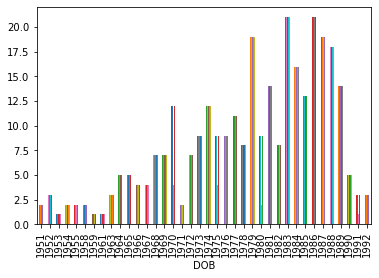

In [182]:
df.groupby(df["DOB"].dt.year).count().plot(kind="bar", legend=False)

<AxesSubplot:xlabel='DateofHire'>

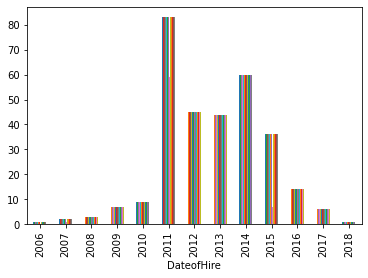

In [183]:
#df[["DOB"]].sort_values(by=['DOB'])

df.groupby(df["DateofHire"].dt.year).count().plot(kind="bar", legend=False)


<AxesSubplot:xlabel='DateofTermination'>

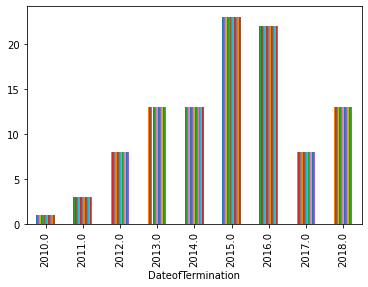

In [108]:
df.groupby(df["DateofTermination"].dt.year).count().plot(kind="bar", legend=False)


In [162]:
df[["Employee_Name","DateofTermination"]]

,Employee_Name,DateofTermination
0,"Adinolfi, Wilson K",NaN
1,"Ait Sidi, Karthikeyan",6/16/2016
2,"Akinkuolie, Sarah",9/24/2012
3,"Alagbe,Trina",NaN
4,"Anderson, Carol",9/6/2016
...,...,...
306,"Woodson, Jason",NaN
307,"Ybarra, Catherine",9/29/2015
308,"Zamora, Jennifer",NaN
309,"Zhou, Julia",NaN


In [168]:
df[["Employee_Name"]][df['DateofTermination'].isnull()]

,Employee_Name
0,"Adinolfi, Wilson K"
3,"Alagbe,Trina"
5,"Anderson, Linda"
6,"Andreola, Colby"
7,"Athwal, Sam"
...,...
305,"Wolk, Hang T"
306,"Woodson, Jason"
308,"Zamora, Jennifer"
309,"Zhou, Julia"


In [170]:
df[df['DateofTermination'].isnull()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,36
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,31
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15,42
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19,40
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14,34
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,34
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,40
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,40
